¡Hola, Alejandra!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto:

<div class="alert alert-block alert-info">

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Alejandra! Has hecho un excelente trabajo con los ajustes, cada vez más cerca de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis.

Sigue con el excelente trabajo!
</div>

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

# Inicialización






In [16]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as mt
from math import factorial

# Cargar datos

In [17]:
# Carga el archivos del DataFrame Games e Imprimir la información general/resumida

games = pd.read_csv("games.csv")

# Mostrar la Información general del DataFrame
print(games.info())
print()
# Mostrar las primeras filas del DataFrame
print(games.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     2


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

Que observo de los datos:

1.Hay que cambiar "Year_of_Release" de float64 a int64
  por que los años para este caso de análisis los necesitamos en # enteros

2.Así como también "User_Score" de object a float64
  por que veníamos manejando los # como float64 en Ventas y critic_score, así que para que haya concordancia y facilidad de análisis los requerimos en el mismo formato.

3.Ver cuantos nulos tengo

# Preparar los datos

In [18]:
# Reemplazar nombres de columnas por minúsculas
games.columns = games.columns.str.lower()

# Verificar los cambios
print(games.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


Usar convert_dtypes():
Si estás trabajando con una versión reciente de pandas (>= 1.0), puedes emplear el método convert_dtypes(), que intenta asignar automáticamente el tipo de dato más apropiado a cada columna. Por ejemplo:

games = games.convert_dtypes()

In [19]:
# Convertir 'year_of_release' a entero (int)
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce').astype('Int64')

# games['Year_of_Release'] = games['Year_of_Release'].astype('Int64')

# Convertir 'User_score' a (float)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce').astype('float')

# games['User_Score'] = games['User_Score'].astype('float')

# Contar los valores nulos en cada columna
valores_nulos = games.isnull().sum()

# Verificar los cambios
print(games.info())
print("\n" + "-"*20 + "\n")
print(games.head())
print("\n" + "-"*20 + "\n")
print("\nValores nulos por columna:")
print(valores_nulos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB
None

--------------------

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES     

En Pandas se utiliza np.nan porque es la constante definida en Numpy para representar valores “Not a Number” (NaN), que es el marcador estándar de datos faltantes en las operaciones de Pandas.

In [20]:
# Reemplazar "TBD" por NaN en 'user_score'
games['user_score'] = games['user_score'].replace('tbd', np.nan)

# Convertir 'user_score' a tipo numérico (float)
games['user_score'] = games['user_score'].astype('float')

# Verificar los cambios
print(games["user_score"].dtype)
print(games["user_score"].unique())

float64
[8.  nan 8.3 8.5 6.6 8.4 8.6 7.7 6.3 7.4 8.2 9.  7.9 8.1 8.7 7.1 3.4 5.3
 4.8 3.2 8.9 6.4 7.8 7.5 2.6 7.2 9.2 7.  7.3 4.3 7.6 5.7 5.  9.1 6.5 8.8
 6.9 9.4 6.8 6.1 6.7 5.4 4.  4.9 4.5 9.3 6.2 4.2 6.  3.7 4.1 5.8 5.6 5.5
 4.4 4.6 5.9 3.9 3.1 2.9 5.2 3.3 4.7 5.1 3.5 2.5 1.9 3.  2.7 2.2 2.  9.5
 2.1 3.6 2.8 1.8 3.8 0.  1.6 9.6 2.4 1.7 1.1 0.3 1.5 0.7 1.2 2.3 0.5 1.3
 0.2 0.6 1.4 0.9 1.  9.7]


In [21]:
# Calcular media y mediana de critic_score y user_score

critic_score_media = games['critic_score'].mean()
critic_score_mediana = games['critic_score'].median()

user_score_media = games['user_score'].mean()
user_score_mediana = games['user_score'].median()

print(f"Critic Score - Media: {critic_score_media:.2f}, Mediana: {critic_score_mediana:.2f}")
print(f"User Score - Media: {user_score_media:.2f}, Mediana: {user_score_mediana:.2f}")

Critic Score - Media: 68.97, Mediana: 71.00
User Score - Media: 7.13, Mediana: 7.50


In [ ]:
# Rellenar los valores nulos
games['rating'] = games['rating'].fillna('Unknown')

# Calcular el porcentaje de valores nulos por columna
null_percentage = (games.isnull().sum() / len(games) * 100).round(2)

# Mostrar los resultados
print(null_percentage)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating              0.00
dtype: float64


Al analizar los datos de las columnas critic_score y user_score, observamos que presentan porcentajes de valores nulos del 51.32% y 54.59%, respectivamente. Dado que estas proporciones representan más del 50% del total de los datos, eliminarlos no es una opción viable, ya que podría distorsionar significativamente los resultados del análisis. Asimismo, usar la media o la mediana para rellenar estos valores nulos no es aconsejable, debido a la gran variabilidad y posibles sesgos presentes en las puntuaciones.

Ventajas de mantener los valores nulos:

Análisis más realista: Mantener los valores nulos permite reflejar de manera más precisa la realidad de la incertidumbre o la falta de datos en ciertos contextos. Esto nos proporciona una comprensión más completa de las limitaciones y características de nuestro conjunto de datos.

Preservación de la integridad del análisis: Al no imputar valores artificiales, evitamos introducir posibles sesgos que podrían alterar los resultados y conclusiones del análisis.

Identificación de patrones y tendencias: Los valores nulos pueden indicar áreas donde los datos son escasos o presentan inconsistencias. Mantener estos valores nos ayuda a identificar patrones o tendencias en la recopilación de datos, permitiéndonos mejorar futuros procesos de recolección y análisis.

Por lo tanto, he decidido dejar los valores nulos en critic_score y user_score tal como están, asegurando así que nuestros análisis y conclusiones se basen en una representación honesta y completa de los datos disponibles.

In [23]:
# Encontrar el año más antiguo registrado en los datos
primer_año_registrado = games['year_of_release'].min()

print(f"El año más antiguo registrado en los datos es: {primer_año_registrado}")

El año más antiguo registrado en los datos es: 1980


Explicación

1. Posibles Explicaciones para los Valores Nulos:
year_of_release: Los valores pueden estar ausentes debido a la falta de registros históricos completos o errores en la recopilación de datos.

2. critic_score y user_score: Los valores ausentes pueden ocurrir porque algunos juegos no recibieron suficientes reseñas en el momento de la recopilación de datos.

3. rating: Los valores pueden estar ausentes porque algunos juegos no fueron clasificados por la ESRB o la clasificación no estaba disponible en el momento de la recopilación de datos. Rellenar los valores nulos con 'Unknown' o una categoría similar. Esto permitirá conservar los datos y gestionar juegos que no tienen clasificación ESRB.

Además que para "1980" no se contaba con la tecnología que tenemos ahora, las actividades o maneras de trabajar y/o abordar problematicas(retos) también van evolucionando así como las plataformas de video juegos

In [24]:
# Calcular las ventas totales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

# Verificar los cambios
print(games.head())


                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45          76.0         8.0        E   
1      3.58      6.81         0.77           NaN         NaN  Unknown   
2     12.76      3.79         3.29          82.0         8.3        E   
3     10.93      3.28         2.95          80.0         8.0        E   
4      8.89     10.22         1.00           NaN         NaN  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

<div class="alert alert-block alert-danger">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas.

Solamente en estos casos cuando trabajamos con distribuciones sesgadas como en este caso se recomienda completar los valores nulos con la mediana para no sesgar nuestros resultados

Gracias por los comentarios, lo cheque con mi tutor(Andrés y en co learning), En resumen lo  mas adecuado es dejarlos.



<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola, Alejandra. De acuerdo, de cualquier manera en futuras ocasiones puedes realizar el análisis comparativo de ajustar con la mediana y sin esos valores

# Analizar los datos

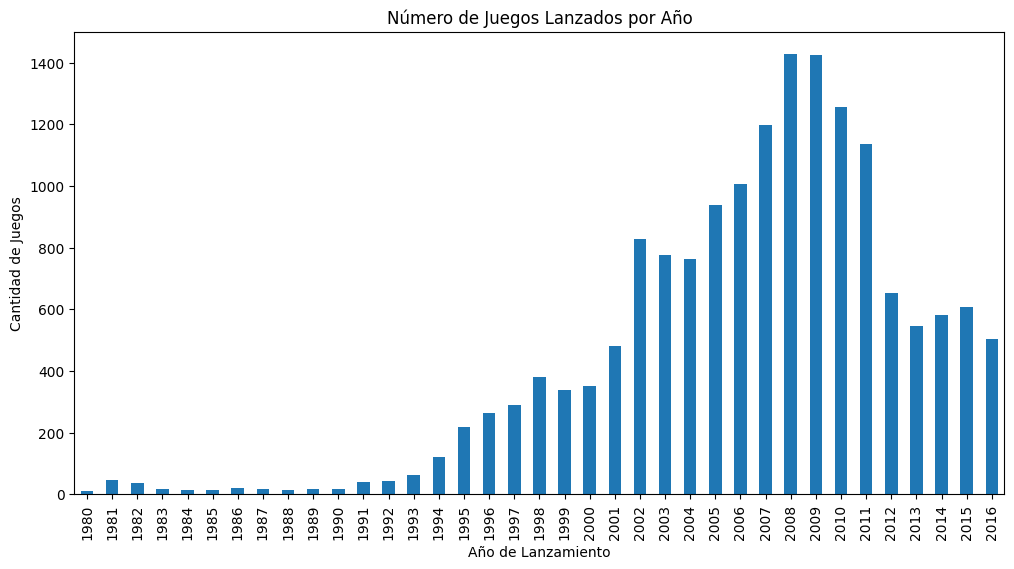

In [25]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

# Contar juegos lanzados por año
juegos_por_año = games['year_of_release'].value_counts().sort_index()

# Graficar el número de juegos lanzados por año
plt.figure(figsize=(12, 6))
juegos_por_año.plot(kind='bar')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Exelente trabajo con el desarrollo de la gráfica, nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



Como se observa en la gráfica se lanzaron más juegos desde el año 2002 al 2011

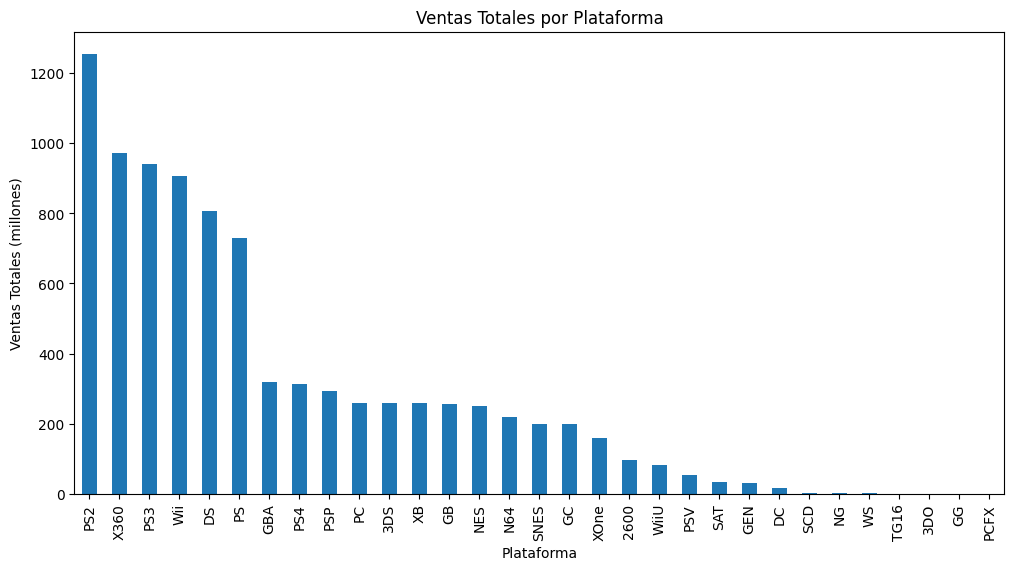

In [26]:
# Calcular las ventas totales para cada plataforma
ventas_por_plataforma = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Graficar las ventas totales por plataforma
plt.figure(figsize=(12, 6))
ventas_por_plataforma.plot(kind='bar')
plt.title('Ventas Totales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.show()


Las plataformas con más ventas fueron: PS2,X360,PS3,Wii,DS y PS

In [47]:
# Seleccionar las plataformas principales
plataformas_principales = ventas_por_plataforma.head(5).index

# Filtrar datos para las plataformas principales
games_principales = games[games['platform'].isin(plataformas_principales)]

# Agrupar por plataforma y año de lanzamiento, y sumar las ventas
ventas_anuales_plataformas = games_principales.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack().T

# Graficar la distribución de ventas anuales para las plataformas principales
#plt.figure(figsize=(15, 8))
#for plataforma in plataformas_principales:
#    plt.plot(ventas_anuales_plataformas.index, ventas_anuales_plataformas[plataforma], label=plataforma)

#plt.title('Distribución de Ventas Anuales por Plataforma')
#plt.xlabel('Año de Lanzamiento')
#plt.ylabel('Ventas Totales (millones)')
#plt.legend(title='Plataforma')
#plt.grid(True)
#plt.show()


El uso de .unstack().T transforma la Serie agrupada en un DataFrame donde cada fila es un año y cada columna una plataforma, permitiendo comparar y visualizar fácilmente los cambios en las ventas anuales de las plataformas principales

Utilizando .index extraes precisamente esos nombres (o etiquetas) de plataforma que te interesan. Esto te permite después filtrar el conjunto original de juegos y trabajar con las plataformas que tienen un mayor impacto o relevancia.

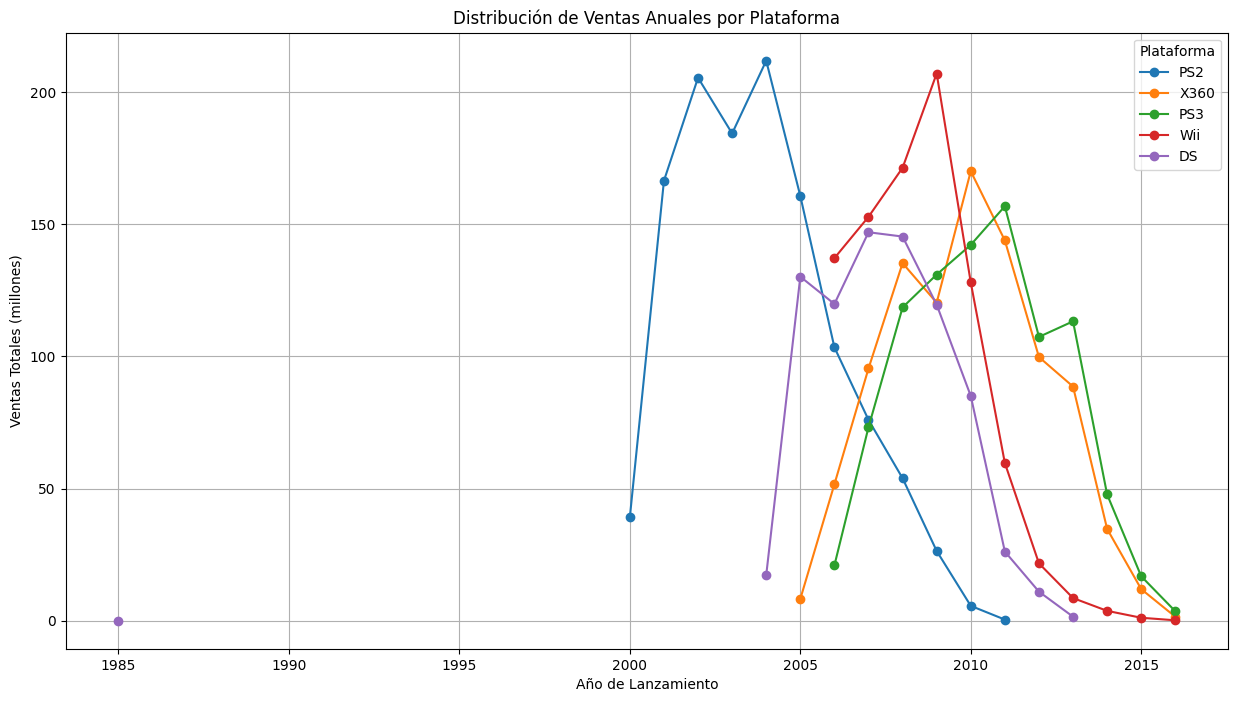

In [28]:
# Graficar la distribución de ventas anuales para las plataformas principales sin un ciclo for
ventas_anuales_plataformas[plataformas_principales].plot(figsize=(15, 8), marker='o')

plt.title('Distribución de Ventas Anuales por Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

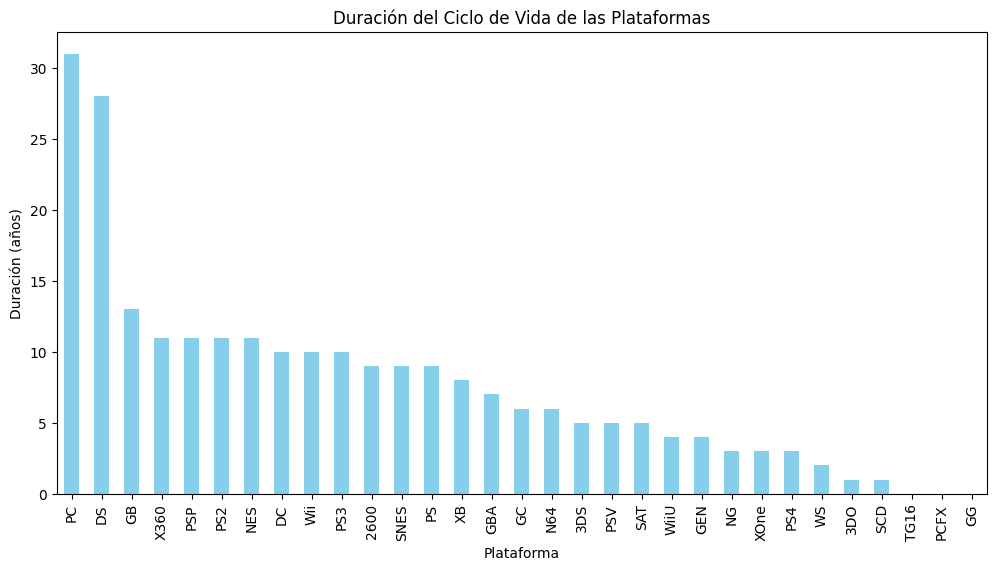

In [29]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

# Obtener el primer y último año de ventas por plataforma
primer_año = games.groupby('platform')['year_of_release'].min()
último_año = games.groupby('platform')['year_of_release'].max()

# Crear un DataFrame con la información de los años
ciclo_de_vida = pd.DataFrame({'primer_año': primer_año, 'último_año': último_año})

# Calcular la duración del ciclo de vida
ciclo_de_vida['duración'] = ciclo_de_vida['último_año'] - ciclo_de_vida['primer_año']

# Graficar la duración del ciclo de vida de las plataformas
plt.figure(figsize=(12, 6))
ciclo_de_vida['duración'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Duración del Ciclo de Vida de las Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Duración (años)')
plt.show()

¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

De acuerdo al análisis y la gráfica podemos decir que la PC estuvo en el mercado por más de 30 años, en segun lugar DS estuvo más de 25 años y en tercero GB con más de 10años. A lo largo del tiempo se han ido reduciendo sus ciclos de vida.  

Período de Datos para el Modelo 2017

Tomando en cuenta el análisis, se recomienda usar datos de al menos los últimos 5 años antes de 2017. Esto nos da un equilibrio entre la cantidad suficiente de datos recientes y la captación de tendencias significativas en el mercado.
Período de Datos: 2012-2016

El parámetro engine='python' se utiliza para indicarle a la función query que evalúe la expresión usando el intérprete de Python en lugar del motor por defecto (numexpr). Por defecto, Pandas utiliza numexpr, que es más rápido pero tiene ciertas limitaciones en cuanto a la sintaxis que puede procesar. En este caso, la expresión 2012 <= year_of_release <= 2016 es un ejemplo de comparación encadenada, la cual no es soportada de forma nativa por numexpr.

games_periodo = games.query('(year_of_release >= 2012) and (year_of_release <= 2016)')

En este caso, al usar operadores lógicos explícitos, podrías omitir el parámetro engine, ya que la sintaxis es compatible con numexpr.

In [30]:
# Filtrar datos para el período 2012-2016 usando query
games_periodo = games.query('2012 <= year_of_release <= 2016', engine='python')


# Verificar los datos filtrados
print(games_periodo.info())
print()
print(games_periodo.head())

<class 'pandas.core.frame.DataFrame'>
Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB
None

                          name platform  year_of_release         genre  \
16          Grand Theft Auto V      PS3             2013        Action   
23          Grand Theft Auto V    

In [31]:
# 1. ¿Qué plataformas son líderes en ventas?

# Calcular las ventas totales para cada plataforma en el período relevante
ventas_por_plataforma = games_periodo.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Crear un DataFrame a partir de los resultados
df_ventas_por_plataforma = ventas_por_plataforma.reset_index()

# Renombrar las columnas
df_ventas_por_plataforma.columns = ['Plataforma', 'Ventas Totales']

# Mostrar las plataformas líderes en ventas
print(df_ventas_por_plataforma.head())

  Plataforma  Ventas Totales
0        PS4          314.14
1        PS3          288.79
2       X360          236.54
3        3DS          194.61
4       XOne          159.32


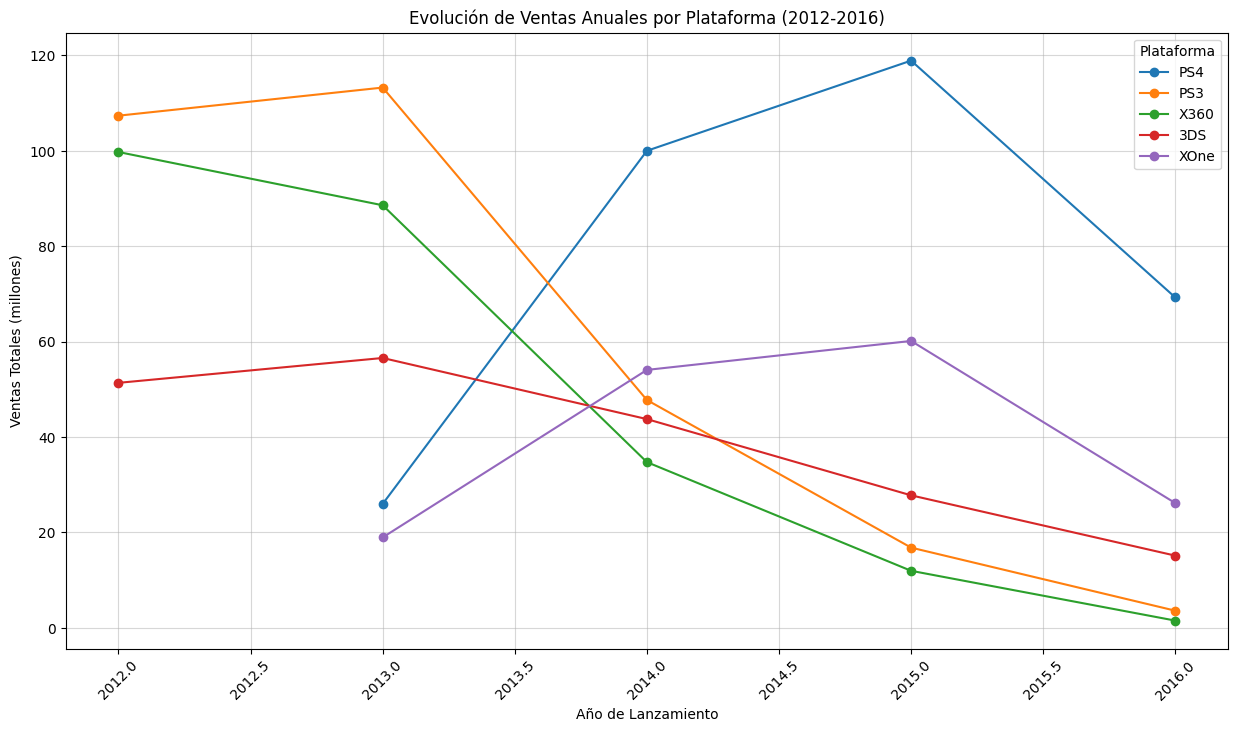

In [32]:
# ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

# Agrupar por plataforma y año de lanzamiento, y sumar las ventas
ventas_anuales_plataformas = games_periodo.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack().T

# Graficar la evolución de las ventas anuales para las plataformas líderes
plt.figure(figsize=(15, 8))
for plataforma in ventas_por_plataforma.head(5).index:
    plt.plot(ventas_anuales_plataformas.index, ventas_anuales_plataformas[plataforma], label=plataforma, marker='o')

plt.title('Evolución de Ventas Anuales por Plataforma (2012-2016)')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.grid(True)
plt.show()


2. Crecimiento y Disminución:

a) PS4 y XONE muestran un crecimiento constante en ventas.

b) PS3, X360, 3DS muestran una disminución en ventas.

In [33]:
# Calcular las ventas totales para cada plataforma en el período relevante
ventas_por_plataforma = games_periodo.groupby('platform')['total_sales'].sum()

# Calcular la media para cada plataforma
media_por_plataforma = games_periodo.groupby('platform')['total_sales'].mean()

# Calcular la desviación estándar para cada plataforma
desviacion_por_plataforma = games_periodo.groupby('platform')['total_sales'].std()

# Crear el DataFrame con las nuevas columnas
df_resultados = pd.DataFrame({
    'Plataforma': ventas_por_plataforma.index,
    'Ventas Totales': ventas_por_plataforma.values,
    'Media': media_por_plataforma.values,
    'Desviación Estándar': desviacion_por_plataforma.values
})

# Mostrar el DataFrame
print(df_resultados.sort_values(by='Ventas Totales', ascending=False).reset_index(drop=True))


   Plataforma  Ventas Totales     Media  Desviación Estándar
0         PS4          314.14  0.801378             1.609456
1         PS3          288.79  0.585781             1.462855
2        X360          236.54  0.810068             1.712069
3         3DS          194.61  0.491439             1.387161
4        XOne          159.32  0.645020             1.036139
5        WiiU           82.19  0.559116             1.058836
6          PC           62.65  0.250600             0.494640
7         PSV           49.18  0.119659             0.203011
8         Wii           35.37  0.655000             1.165447
9          DS           12.55  0.404839             1.439245
10        PSP           11.19  0.064682             0.071296


##Plataformas Líderes en Ventas:
#Las plataformas con mayores ventas totales son:

**PS4 = 314.14
**PS3 = 288.79
**X360 = 236.54
3DS = 194.61
XOne = 159.32

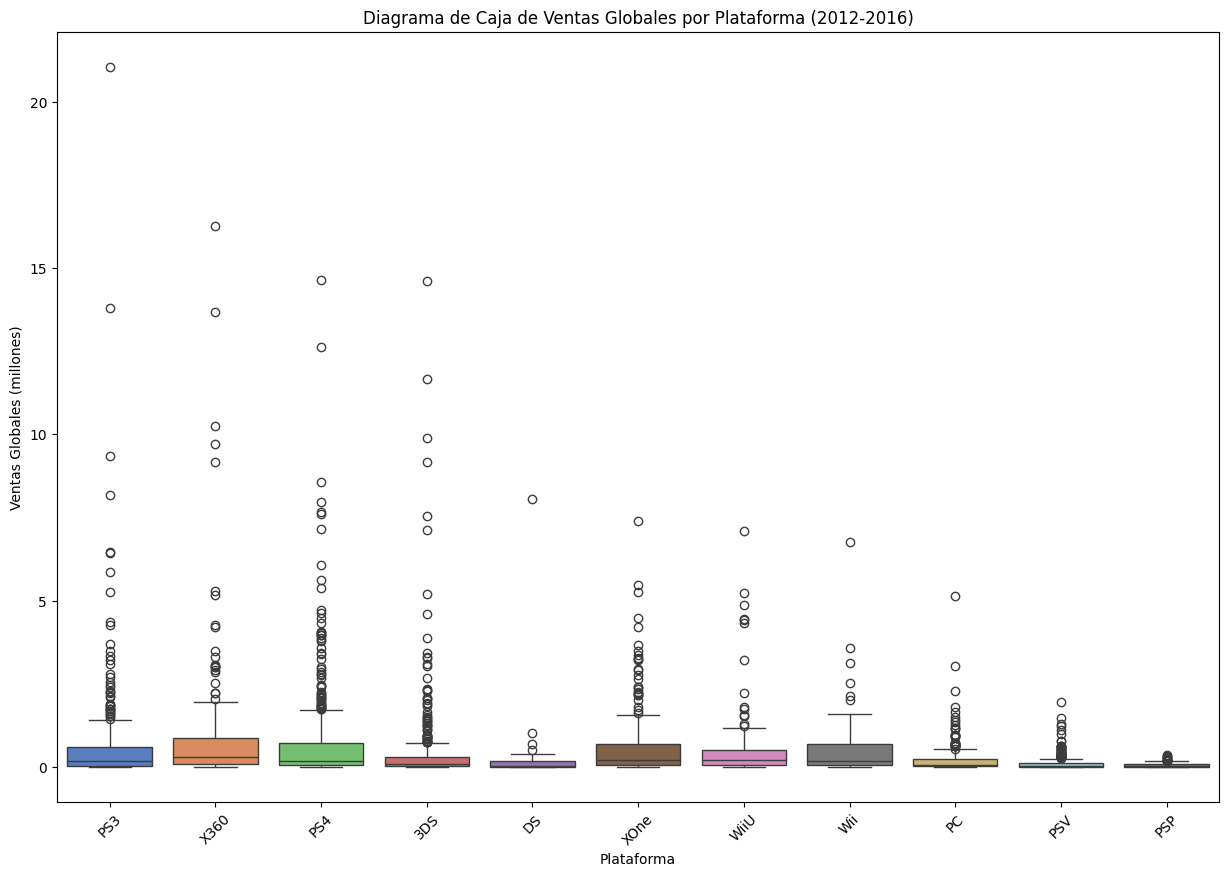

In [34]:
# Crear un diagrama de caja para las ventas globales, desglosados por plataforma
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales', data=games_periodo, hue='platform', palette='muted')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2012-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-warning">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con el desarrollo de la gráfica de cajas, este tipo de gráficos nos ayuda a comparar resultados de manera precisa. Solamente recuerda que los graficos de box-plot nos ayudan a identificar outliers que posteriomente en el desarrollo de las pruebas de hipótesis nos servirían eliminar para que no puedan sesgar nuestros resultados.
</div>

Número de outliers: 333
porcentaje de outliers: 11.54


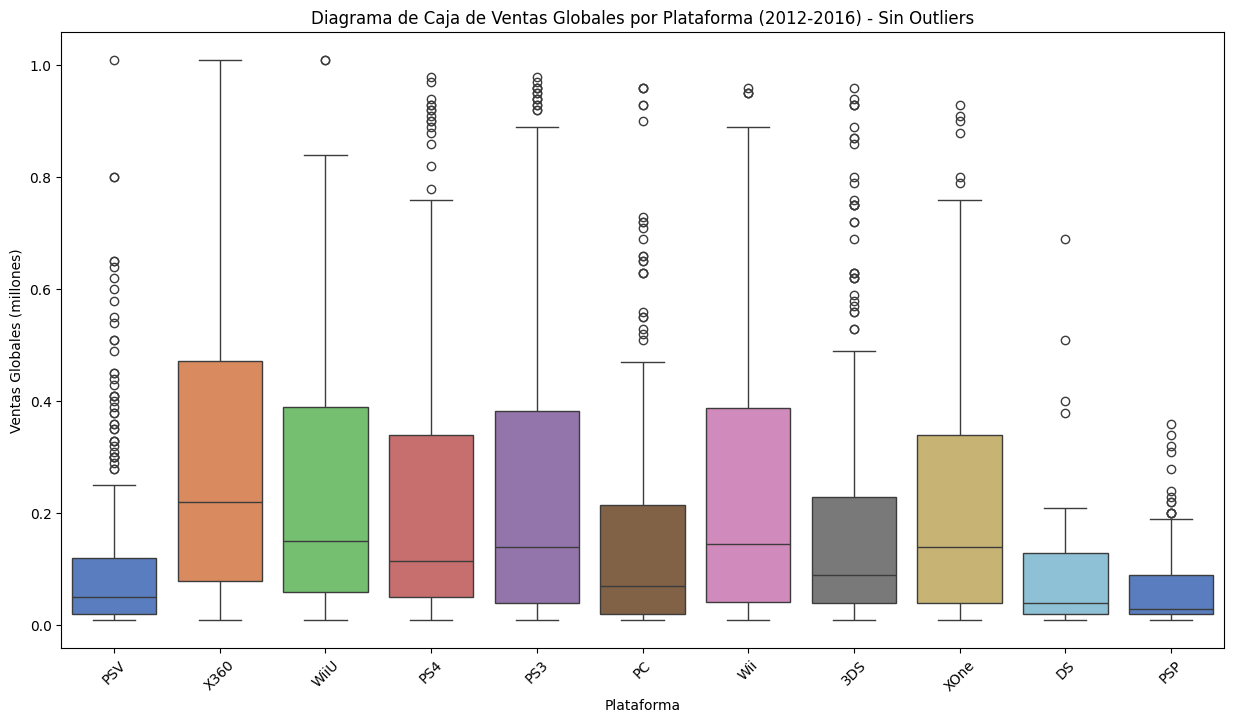

In [ ]:
# Calcular IQR
Q1 = games_periodo['total_sales'].quantile(0.25)
Q3 = games_periodo['total_sales'].quantile(0.75)
IQR = Q3 - Q1                     #Rango Intercuartilico

# Definir límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = games_periodo[(games_periodo['total_sales'] < lower_bound) | (games_periodo['total_sales'] > upper_bound)]

print("Número de outliers:", len(outliers))
print("porcentaje de outliers:", round(len(outliers) / len(games_periodo) * 100,2))

# Opcional: Eliminar outliers del DataFrame
games_periodo_clean = games_periodo[~((games_periodo['total_sales'] < lower_bound) | (games_periodo['total_sales'] > upper_bound))]

# Crear un diagrama de caja para las ventas globales, desglosados por plataforma sin outliers
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='total_sales', data=games_periodo_clean, hue='platform', palette='muted')
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2012-2016) - Sin Outliers')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.show()

interpretación detallada del diagrama de caja:

1. **Distribución y Mediana:**  
   Cada caja representa la dispersión de las ventas globales para una plataforma durante el período 2012–2016. La línea horizontal dentro de cada caja marca la mediana, es decir, el valor central de las ventas. Si la mediana está cerca del borde inferior o superior de la caja, puede indicar una asimetría en la distribución.

2. **Rango Intercuartílico (IQR):**  
   La parte central (la caja) abarca el rango intercuartílico, que contiene al 50% de los datos (desde el primer al tercer cuartil). Una caja más ancha señala mayor varianza en las ventas de esa plataforma, mientras que una caja más estrecha indica que la mayoría de los juegos tienen ventas bastante concentradas alrededor de la mediana.

3. **Bigotes (Whiskers):**  
   Los “bigotes” se extienden hasta los valores máximos y mínimos que no se consideran outliers, típicamente hasta 1.5 veces el IQR por encima o por debajo de la caja. Esto te brinda una idea del rango de ventas “normales” para cada plataforma.

4. **Outliers:**  
   Los círculos que aparecen fuera de los bigotes representan valores atípicos, es decir, juegos que han alcanzado ventas inusualmente altas o bajas en comparación con la mayoría. La presencia y la dispersión de estos outliers pueden indicar que, aunque la mayoría de los juegos siga una tendencia, existen excepciones notables.

5. **Comparación Entre Plataformas:**  
   Al observar el diagrama, es posible comparar rápidamente la mediana y la variabilidad de las ventas entre plataformas. Por ejemplo, si una plataforma muestra una mediana notablemente más alta y una caja (IQR) relativamente estrecha, podríamos inferir que esa consola tiende a tener ventas globales más consistentes y elevadas. En cambio, una plataforma con gran dispersión (caja amplia y varios outliers) puede tener una performance más heterogénea, donde algunos juegos han vendido muchísimo mientras que otros no tanto.

En conjunto, el diagrama de caja resulta muy útil para visualizar la “historia” de las ventas: la tendencia central, la dispersión y la existencia de casos excepcionales (outliers) en cada plataforma, lo cual puede servir para identificar qué sistemas han sido más consistentes o excepcionales en el mercado durante el período analizado.


Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

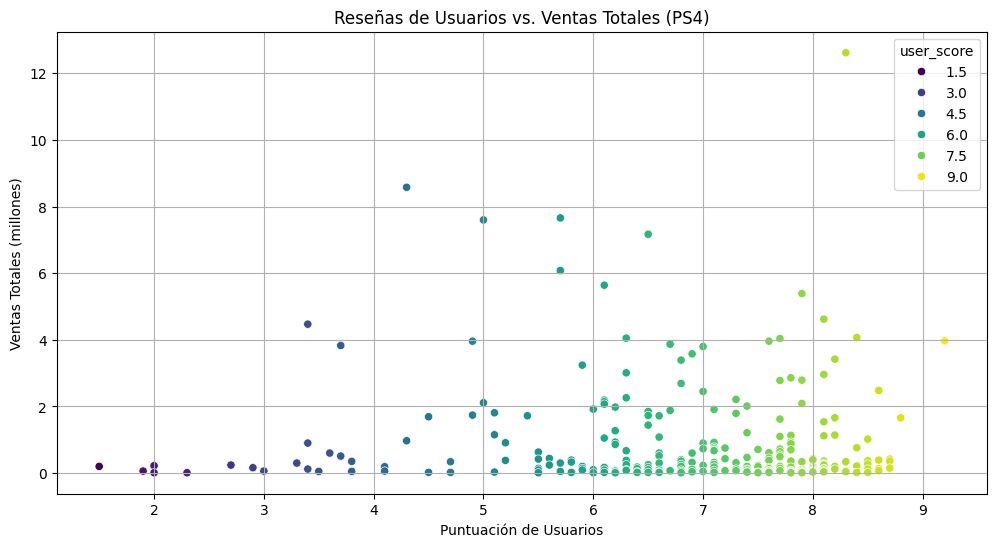

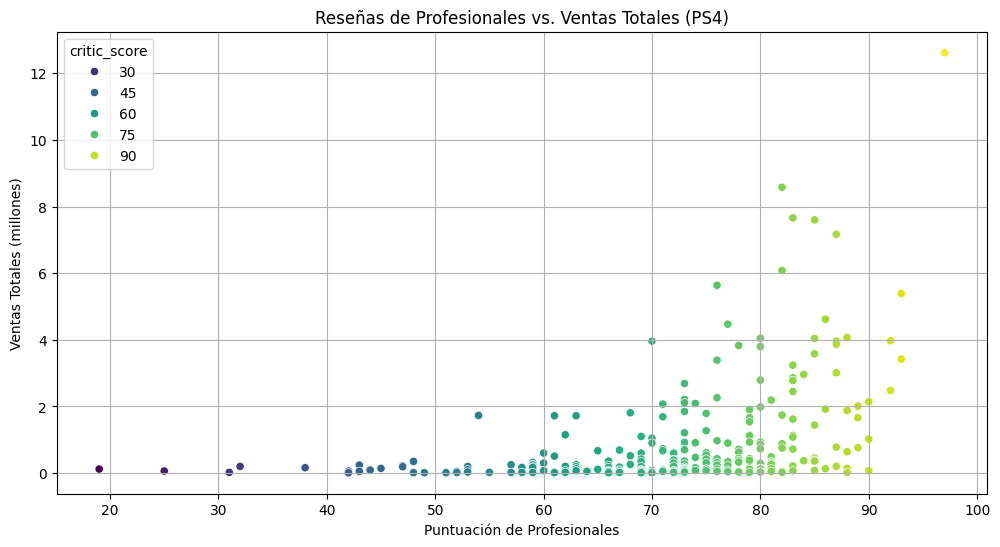

In [36]:
# Filtrar datos para la plataforma PS4
ps4_games = games_periodo.query('platform == "PS4"')

# Gráfico de dispersión para las reseñas de usuarios vs. ventas totales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_games, hue='user_score', palette='viridis')
plt.title('Reseñas de Usuarios vs. Ventas Totales (PS4)')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

# Gráfico de dispersión para las reseñas de profesionales vs. ventas totales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_games, hue='critic_score', palette='viridis')
plt.title('Reseñas de Profesionales vs. Ventas Totales (PS4)')
plt.xlabel('Puntuación de Profesionales')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo con el análisis de la relación de score con las ventas

In [37]:
# Correlación entre las reseñas de usuarios y las ventas totales
correlacion_user_score = ps4_games[['user_score', 'total_sales']].corr().iloc[0, 1]
print(f"Correlación entre las reseñas de usuarios y las ventas totales: {correlacion_user_score:.2f}")

# Correlación entre las reseñas de profesionales y las ventas totales
correlacion_critic_score = ps4_games[['critic_score', 'total_sales']].corr().iloc[0, 1]
print(f"Correlación entre las reseñas de profesionales y las ventas totales: {correlacion_critic_score:.2f}")


Correlación entre las reseñas de usuarios y las ventas totales: -0.03
Correlación entre las reseñas de profesionales y las ventas totales: 0.41


Conclusiones
Reseñas de Usuarios:

Las puntuaciones de los usuarios no parecen influir significativamente en las ventas de los juegos en la PS4, según los datos disponibles. Puede haber otros factores que los consumidores consideran más importantes al decidir qué juegos comprar, como el marketing, las franquicias populares o las promociones.
Esto es una correlación negativa.

Reseñas de Profesionales:

Las reseñas de los críticos tienen un impacto moderado en las ventas. Los consumidores pueden estar utilizando las opiniones de los críticos como una guía para sus decisiones de compra, confiando en la evaluación profesional para elegir juegos de mayor calidad.
Esto es una correlación positiva

Correlación entre reseñas de usuarios y ventas totales (-0.03):

Este valor es prácticamente cero, lo que indica que, en el conjunto de datos de juegos para PS4, no existe una relación lineal significativa entre la puntuación dada por los usuarios y las ventas totales. Aunque el valor es ligeramente negativo, la magnitud es tan pequeña que sugiere que las variaciones en la puntuación de usuarios apenas, o nada, se asocian con cambios en las ventas.

Correlación entre reseñas de profesionales y ventas totales (0.41):

Un coeficiente de 0.41 implica una relación linear moderada y positiva. Esto sugiere que a mayor puntuación de los críticos, tienden a venderse más copias del juego, al menos en términos de asociación lineal. Sin embargo, es importante recordar que la correlación no implica causalidad; es decir, aunque se observe que los juegos con mejores reseñas de profesionales tienen ventas mayores, esto no significa necesariamente que las reseñas sean la causa principal del aumento en ventas. Otros factores podrían estar influyendo



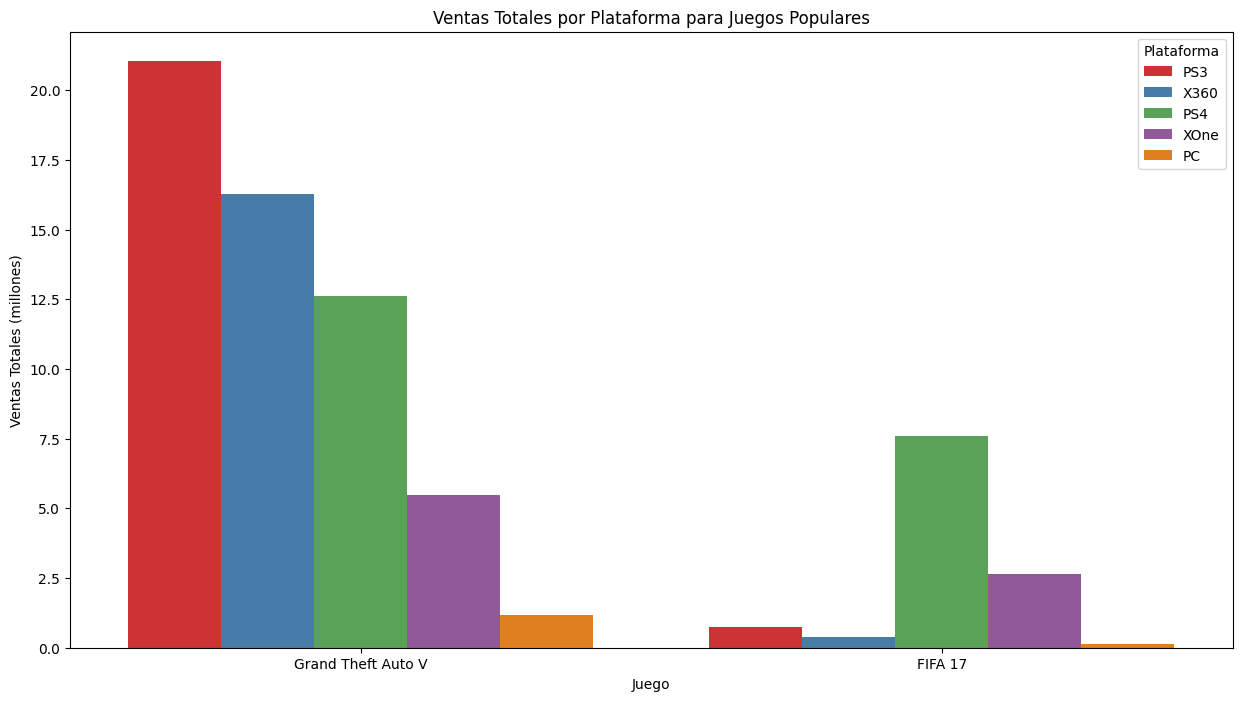

In [55]:
# Comparación de Ventas en Diferentes Plataformas

# Filtrar juegos lanzados en múltiples plataformas
juegos_multiplataforma = games.groupby('name').filter(lambda x: x['platform'].nunique() > 1)

# Seleccionar algunos juegos populares para el análisis
juegos_populares = juegos_multiplataforma[juegos_multiplataforma['name'].isin(['Grand Theft Auto V', 'Call of Duty: Modern Warfare', 'FIFA 17'])]

# Graficar las ventas totales por plataforma para los juegos seleccionados
plt.figure(figsize=(15, 8))
sns.barplot(x='name', y='total_sales', hue='platform', data=juegos_populares, palette='Set1')
plt.title('Ventas Totales por Plataforma para Juegos Populares')
plt.xlabel('Juego')
plt.ylabel('Ventas Totales (millones)')
plt.legend(title='Plataforma')
plt.show()


Conclusiones de la comparación de ventas de los mismos juegos en otras plataformas:
Al observar el gráfico de barras, podemos comparar las ventas de juegos populares como "Grand Theft Auto V" en diferentes plataformas. Esto nos permite identificar qué plataformas tienen mayores ventas para estos juegos.

Factores de Ventas: Las ventas pueden variar significativamente entre plataformas debido a factores como la base de usuarios, el marketing y las características específicas de cada consola.

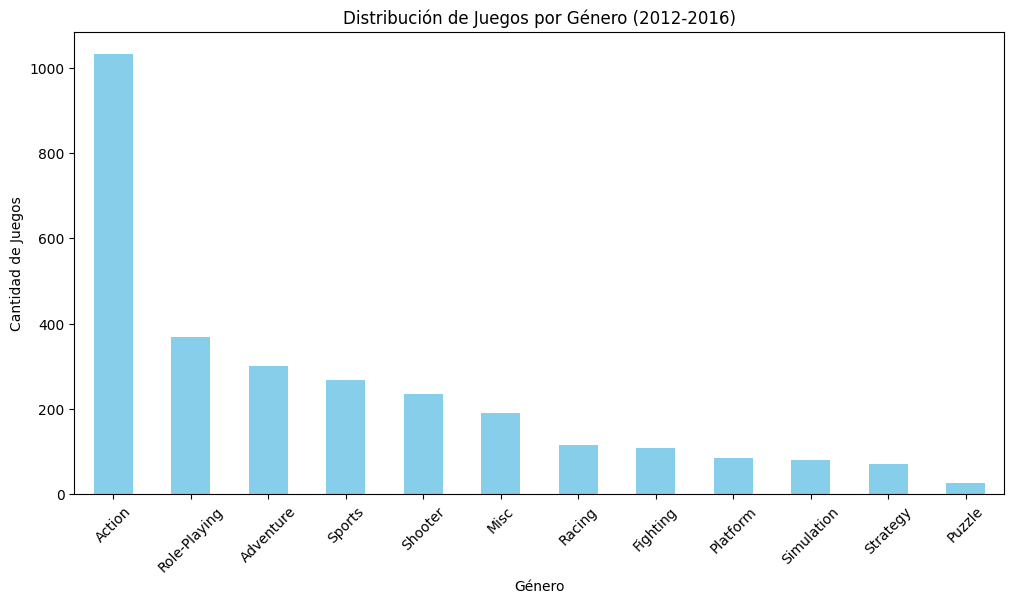

In [39]:
# Distribución General de Juegos por Género

# Calcular la distribución de juegos por género
distribucion_genero = games_periodo['genre'].value_counts()

# Dado que estamos tratando con datos categóricos (géneros de juegos), un gráfico de barras es más apropiado.
# Graficar la distribución de juegos por género
plt.figure(figsize=(12, 6))
distribucion_genero.plot(kind='bar', color='skyblue')
plt.title('Distribución de Juegos por Género (2012-2016)')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.show()


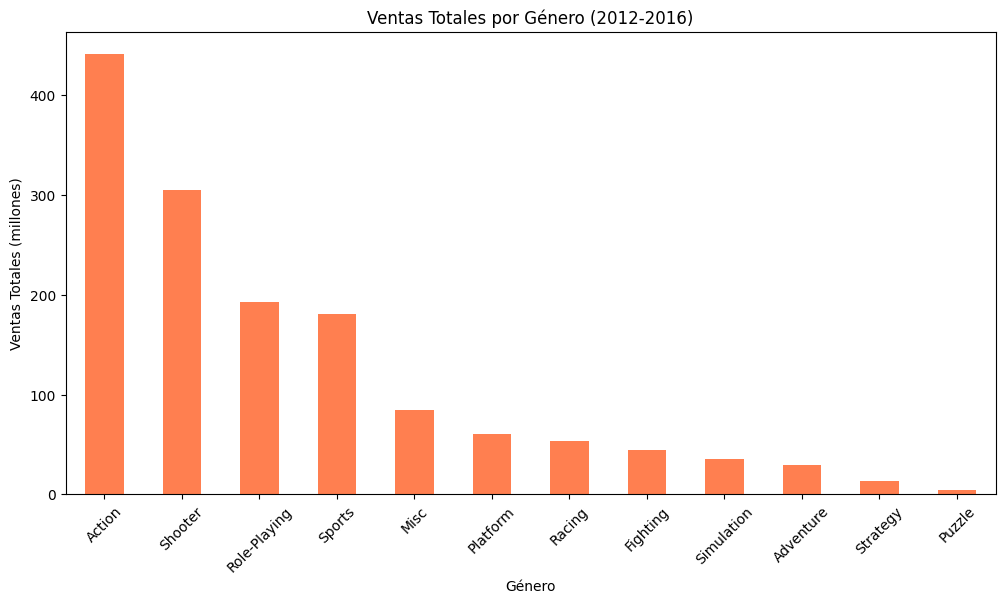

In [40]:
# Calcular las ventas totales por género
ventas_por_genero = games_periodo.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Graficar las ventas totales por género
plt.figure(figsize=(12, 6))
ventas_por_genero.plot(kind='bar', color='coral')
plt.title('Ventas Totales por Género (2012-2016)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.show()

Generalizaciones sobre Géneros con Ventas Altas y Bajas

Géneros Rentables:

Los géneros de Acción y Shooter suelen liderar en ventas totales debido a su gran base de fans y lanzamientos frecuentes de nuevas entregas.

Deportes también es un género rentable debido a franquicias populares como FIFA y Madden NFL.

Géneros con Ventas Bajas:

Géneros como Aventura y Puzzle pueden tener ventas más bajas. Aunque pueden tener juegos muy bien recibidos, no atraen a una audiencia tan amplia como los géneros principales.

# Crea un perfil de usuario para cada región

In [41]:
# Calcular las ventas totales por plataforma en cada región
ventas_por_plataforma_na = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
ventas_por_plataforma_na.columns = ['Plataforma', 'Ventas Totales NA']

ventas_por_plataforma_eu = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
ventas_por_plataforma_eu.columns = ['Plataforma', 'Ventas Totales EU']

ventas_por_plataforma_jp = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
ventas_por_plataforma_jp.columns = ['Plataforma', 'Ventas Totales JP']

# Mostrar los resultados
print("Plataformas principales en NA:")
print(ventas_por_plataforma_na.head())

print("\nPlataformas principales en EU:")
print(ventas_por_plataforma_eu.head())

print("\nPlataformas principales en JP:")
print(ventas_por_plataforma_jp.head())


Plataformas principales en NA:
  Plataforma  Ventas Totales NA
0       X360             602.47
1        PS2             583.84
2        Wii             496.90
3        PS3             393.49
4         DS             382.40

Plataformas principales en EU:
  Plataforma  Ventas Totales EU
0        PS2             339.29
1        PS3             330.29
2       X360             270.76
3        Wii             262.21
4         PS             213.61

Plataformas principales en JP:
  Plataforma  Ventas Totales JP
0         DS             175.57
1         PS             139.82
2        PS2             139.20
3       SNES             116.55
4        3DS             100.67


Ventas totales por Región
Norteamérica (NA)

En Norteamérica, Xbox 360 lidera las ventas, seguida de cerca por PlayStation 2 y  Wii. Esto indica una fuerte preferencia por las consolas de Microsoft y Nintendo.

Europa (EU)

En Europa, las consolas de Sony dominan el mercado con la PlayStation 2 y  PlayStation 3, seguidas por Xbox 360 y Wii. Aquí, las consolas de Sony tienen una ventaja notable.

Japón (JP)

En Japón, las consolas de Nintendo y Sony dominan. Nintendo DS es la plataforma líder, seguida por PlayStation y PlayStation 2. (compiten estrechamente)

Estas diferencias pueden deberse a factores culturales, estrategias de marketing regionales, disponibilidad de juegos exclusivos y preferencias de los jugadores en cada región.

In [42]:
# Determinar las Cinco Géneros Principales por Región

# Calcular las ventas totales por género en cada región
ventas_por_genero_na = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
ventas_por_genero_eu = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
ventas_por_genero_jp = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()


print("Géneros principales en NA:")
print(ventas_por_genero_na)
print("\nGéneros principales en EU:")
print(ventas_por_genero_eu)
print("\nGéneros principales en JP:")
print(ventas_por_genero_jp)



Géneros principales en NA:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Géneros principales en EU:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Géneros principales en JP:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


En Norteamérica, los géneros Action, Sports, y Shooter dominan las ventas. Esto refleja una preferencia por juegos dinámicos y competitivos que ofrecen experiencias intensas y de ritmo rápido.

En Europa, Action, Sports, y Shooter también son géneros dominantes, pero hay una notable presencia de Racing entre los géneros principales. Esto sugiere un interés significativo en juegos de carreras y simuladores de conducción en el mercado europeo.

En Japón, los géneros Role-Playing (RPG) destacan como el género principal, con ventas significativamente altas en comparación con otros géneros. es el género dominante, reflejando la preferencia por historias ricas y juegos que permiten una inmersión profunda en mundos de fantasía.


In [ ]:
# Analizar el Impacto de las Clasificaciones de ESRB en las Ventas "Entertainment Software Rating Board"

# Filtrar datos por clasificación ESRB
esrb_na = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Clasificaciones ESRB y ventas en NA:")
print(esrb_na)
print("\nClasificaciones ESRB y ventas en EU:")
print(esrb_eu)
print("\nClasificaciones ESRB y ventas en JP:")
print(esrb_jp)

Clasificaciones ESRB y ventas en NA:
rating
E          1292.99
Unknown    1242.46
T           759.75
M           748.48
E10+        353.32
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64

Clasificaciones ESRB y ventas en EU:
rating
E          710.25
Unknown    613.83
M          483.97
T          427.03
E10+       188.52
AO           0.61
K-A          0.27
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64

Clasificaciones ESRB y ventas en JP:
rating
Unknown    841.96
E          198.11
T          151.40
M           64.24
E10+        40.20
K-A          1.46
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


En Norteamérica, las ventas más altas corresponden a las clasificaciones E (Everyone) y T (Teen). Esto sugiere que los juegos aptos para todas las edades y para adolescentes tienen un impacto significativo en las ventas. La clasificación M (Mature 17+) también muestra ventas importantes, lo que indica que los juegos para adultos tienen una buena aceptación, aunque no tanta como los juegos para audiencias más amplias.

En Europa, la clasificación E (Everyone) también lidera las ventas, seguida por las clasificaciones M (Mature 17+) y T (Teen)  . Esto refleja una estructura similar a la de Norteamérica, con una fuerte preferencia por juegos aptos para todas las edades y adolescentes, y una notable aceptación de los juegos maduros.

En Japón, una gran parte de las ventas está etiquetada como Unknown, lo que puede reflejar diferencias en los sistemas de clasificación. Sin embargo, entre las clasificaciones conocidas, E (Everyone) y T (Teen) tienen ventas significativas, mientras que M (Mature 17+) tiene menos impacto en comparación con NA y EU.

Estas diferencias pueden deberse a factores culturales y preferencias específicas en cada región, lo que influye en cómo se comercializan y venden los juegos.

# Prueba las siguientes hipótesis:

1. Hipótesis 1: Calificaciones promedio de los usuarios para Xbox One y PC
Formulación de las Hipótesis

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.

In [ ]:
# Filtrar datos para las plataformas Xbox One y PC
xone_scores = games_periodo.query('platform == "XOne"')['user_score']
pc_scores = games_periodo.query('platform == "PC"')['user_score']

# Imputar valores nulos con la mediana para las plataformas Xbox One y PC
xone_scores_filled = xone_scores.fillna(xone_scores.median())
pc_scores_filled = pc_scores.fillna(pc_scores.median())

# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p_value = st.levene(xone_scores_filled, pc_scores_filled)
print(f"Levene test - stat: {levene_stat:.2f}, p_value: {levene_p_value:.5f}")

# Prueba t de dos muestras para Xbox One y PC
t_stat, p_value = st.ttest_ind(xone_scores_filled, pc_scores_filled, equal_var=False)

# Determinar el valor alfa
alpha = 0.05

# Resultados de la prueba
print(f"t_stat: {t_stat:.2f}, p_value: {p_value:.8f}, alpha: {alpha:.2f}")

# Verificar si se rechaza la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son diferentes.")
else:
    print("No se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.")

Levene test - stat: 11.21, p_value: 0.00087
t_stat: 0.82, p_value: 0.41035290, alpha: 0.05
No se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


Conclusión:

Varianzas: Las varianzas de las calificaciones de los usuarios para Xbox One y PC son diferentes, como lo confirma la prueba de Levene.

Medias: Las calificaciones promedio de los usuarios para Xbox One y PC no son significativamente diferentes, como lo indica la prueba t de Student.

Aunque las varianzas de las calificaciones de los usuarios para las dos plataformas difieren, las medias de las calificaciones no son significativamente diferentes. Esto sugiere que, en general, las calificaciones promedio dadas por los usuarios a los juegos en Xbox One y PC son similares, a pesar de la variabilidad en las calificaciones.

Impute los valores con la mediana ya que es el valor que se encuentra en el punto medio de un conjunto de datos ordenados. No se ve afectada por los valores atípicos y es más representativa del "centro" cuando los datos tienen una distribución sesgada o contienen outliers.





En este código se están aplicando dos pruebas estadísticas encadenadas, cada una con un propósito específico:

1. **Prueba de Levene:**  
   La prueba de Levene se utiliza para evaluar la hipótesis de igualdad de varianzas entre dos grupos (en este caso, las calificaciones de usuario para Xbox One y PC).  
   - **Resultado obtenido:**  
     - Estadístico de Levene: 11.21  
     - p-value: 0.00087  
   Dado que el p-value es menor que el valor alfa (0.05), se rechaza la hipótesis nula de varianzas iguales. Esto indica que **las varianzas de las calificaciones de usuario para Xbox One y PC son significativamente diferentes**.  
   - **Importancia en el análisis:**  
     Con este resultado, sabemos que no podemos asumir la homogeneidad de varianzas entre los grupos. Por eso, en la prueba t se especifica `equal_var=False`, lo que hace que se use una versión del test (Welch’s t-test) que no presupone igualdad de varianzas.

2. **Prueba t de dos muestras:**  
   La prueba t se usa para comparar las medias de dos grupos, de modo que se comprueba la hipótesis nula de que las calificaciones promedio de los usuarios (tras haber imputado los valores nulos con la mediana) para Xbox One y PC son iguales.  
   - **Resultado obtenido:**  
     - Estadístico t: 0.82  
     - p-value: 0.41035290  
   Dado que el p-value es mayor que 0.05, no se rechaza la hipótesis nula. Esto implica que, **a pesar de que las varianzas son diferentes (según Levene), no existe evidencia estadística suficiente para afirmar que las calificaciones promedio de los usuarios se diferencian entre Xbox One y PC**.

En resumen, aunque la prueba de Levene nos mostró que las variaciones en las calificaciones son distintas entre las dos plataformas, la comparación de medias (usando la prueba t ajustada para varianzas desiguales) indica que **las calificaciones promedio de usuario son similares en ambas plataformas**.  
Esta secuencia de pruebas es adecuada: primero se verifica si podemos asumir varianzas iguales y, en caso de que no, se procede a utilizar un test que no lo requiera para evaluar la diferencia en las medias.

2. Hipótesis 2: Calificaciones promedio de los usuarios para los géneros de Acción y Deportes

Formulación de las Hipótesis

Hipótesis nula (H0): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.

Hipótesis alternativa (H1): Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [57]:
# Filtrar datos para los géneros de Acción y Deportes
action_scores = games.query('genre == "Action"')['user_score']
sports_scores = games.query('genre == "Sports"')['user_score']

# Imputar valores nulos con la mediana para los géneros Acción y Deportes
action_scores_filled = action_scores.fillna(action_scores.median())
sports_scores_filled = sports_scores.fillna(sports_scores.median())

# Prueba de Levene para igualdad de varianzas
levene_stat, levene_p_value = st.levene(action_scores_filled, sports_scores_filled)
print(f"Levene test - stat: {levene_stat:.2f}, p_value: {levene_p_value:.5f}")

# Prueba t de dos muestras para Acción y Deportes usando equal_var=False
t_stat, p_value = st.ttest_ind(action_scores_filled, sports_scores_filled, equal_var=True)

# Determinar el valor alfa
alpha = 0.05

# Resultados de la prueba
print(f"t_stat: {t_stat:.2f}, p_value: {p_value:.5f}, alpha: {alpha:.2f}")

# Verificar si se rechaza la hipótesis nula
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.")

Levene test - stat: 0.11, p_value: 0.74149
t_stat: 0.62, p_value: 0.53426, alpha: 0.05
No se rechaza la hipótesis nula. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son las mismas.


A continuación se presenta la conclusión basada en los resultados obtenidos:

1. **Prueba de Levene:**  
   - **Estadístico:** 0.11  
   - **p-value:** 0.74149  
   
   Este resultado indica que no hay diferencias significativas en la variabilidad (varianzas) de las calificaciones de usuario entre los juegos de Acción y Deportes, ya que el p-value es mucho mayor que 0.05. Esto permite asumir igualdad de varianzas para la comparación de medias.

2. **Prueba t de dos muestras (con igualdad de varianzas asumida):**  
   - **Estadístico t:** 0.62  
   - **p-value:** 0.53426  
   - **Nivel de significancia (α):** 0.05  
   
   Dado que el p-value es significativamente mayor que 0.05, no encontramos evidencia suficiente para rechazar la hipótesis nula. Esto significa que las diferencias observadas en las calificaciones promedio de los usuarios entre los juegos de los géneros de Acción y Deportes son muy pequeñas o inexistentes.

**Conclusión Final:**  
No se rechaza la hipótesis nula. Es decir, las calificaciones promedio de los usuarios para los juegos de Acción y Deportes son estadísticamente iguales según los datos analizados. Esto sugiere que, a nivel promedio, la satisfacción o evaluación de los usuarios no difiere de manera significativa entre estos dos géneros.

 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función:
    
    levene(action_scores_filled, sports_scores_filled)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales.
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo con la prueba de levene para mostrar el supuesto de varianzas iguales. Sigue disfrutando los siguientes cursos!

Interpretación
Varianzas: Las varianzas de las calificaciones de los usuarios para los géneros de Acción y Deportes son iguales, como lo confirma la prueba de Levene.

Medias: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son significativamente diferentes, como lo indica la prueba t de Student.

Los datos muestran que tanto las varianzas como las medias de las calificaciones de los usuarios para los géneros de Acción y Deportes no son significativamente diferentes. Esto sugiere que, en general, los usuarios califican los juegos de los géneros de Acción y Deportes de manera similar. No hay diferencias estadísticamente significativas entre las calificaciones promedio de estos dos géneros.


# Conclusión general

Este proyecto nos permitió explorar y analizar en profundidad los datos de ventas de videojuegos a nivel mundial, centrándonos en diversas plataformas, géneros y regiones(NA, EU y JP)

Este análisis detallado del DataFrame games(juegos) nos ha permitido identificar y entender mejor las preferencias y tendencias en diferentes regiones y plataformas. También hemos explorado el impacto de las clasificaciones de ESRB en las ventas y comparado las calificaciones de los usuarios para diferentes plataformas y géneros.

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Alejandra, en general creo que hiciste un muy buen trabajo con el proyecto, pudiste limpiar y trabajar las bases de datos de buena manera. Además, el análisis explorario de datos fue completo al mostrar resultados relevantes que pueden ser de mucha utilidad para la toma de decisiones y desarrollaste las pruebas de hipótesis de una buena manera. No obstante, recuerda que siempre podemos mejorar y te menciono algunos puntos que debes considerar:


*  Considerar eliminar registros atipicos que puedan sesgar nuestros resultados.
    
*  Verificar los supuestos de las pruebas de hipótesis.
    
</div>